[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\annah\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


---------------------------------------------------
1952.txt
accession 0
fellowmen 0
dedicate 0
---------------------------------------------------
1953.txt
auckland 0
fiji 0
tonga 0
bla 0
ablablabal 0
abla 0
abl 0
forbear 0
realise 0
colours 0
tangiwai 0
---------------------------------------------------
1954.txt
auckland 0
centred 0
peacefulness 0
envelops 0
uneventful 0
realise 0
steadfastness 0
adversities 0
wearers 0
pudding 0
nazareth 0
---------------------------------------------------
1955.txt
peaceably 0
undiscovered 0
lighten 0
maori 0
criticise 0
resumes 0
---------------------------------------------------
1956.txt
fulfilment 0
britannia 0
mainspring 0
recognise 0
---------------------------------------------------
1957.txt
malaya 0
---------------------------------------------------
1958.txt
alexandra 0
queensland 0
seaway 0
gambia 0
spacetravel 0
homelands 0
dreamers 0
instil 0
civilisation 0
sandringham 0
---------------------------------------------------
1960.txt
gam

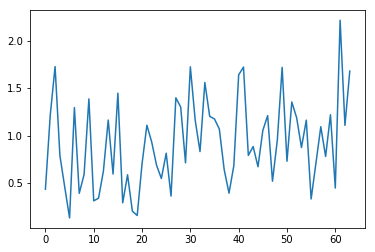

fdist
<FreqDist with 49815 samples and 1161192 outcomes>
len
49815
total_len
536


In [2]:
#this program outputs sorts words in each text according to their frequency in brown corpus
#outputs words of frequency 10 or lower

#results skewed by 0-frequency for british spelling/names of people and places

#TODO: replicate this for a british english corpus
#TODO: eyeball results and get rid of entries which name something


from __future__ import division
import nltk
import os
import string
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import brown
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.stem import WordNetLemmatizer

#full version with plots etc is in pycharm on university computer

def main():
    retrieve_word_frequencies()

def clean_data(f, newcorpus):
    
    # define punctuation
    punctuations = '''!()-–[]{};:'"“”\,<>’./?@#$%^&*_~'''

    lemmatizer = WordNetLemmatizer()

    #get raw text
    raw_text = newcorpus.raw(f)
        
    #get words (between white spaces)
    words = raw_text.split()
        
    #strip punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
        
    #strip non-alphabetics
    alpha_stripped = [word for word in stripped if word.isalpha()]
        
    #convert everything to lower case
    lower_stripped = [word.lower() for word in alpha_stripped]
                
    #lemmatise
    #list_v = ([lemmatizer.lemmatize(t) for t in lower_stripped])
        
    #convert list back to string
    str1 = ' '.join(lower_stripped)
    return str1

    
def retrieve_word_frequencies():
    nltk.download('brown')
    newcorpus = PlaintextCorpusReader('data', '.*')
    files = newcorpus.fileids()
    text = brown.words()
    fdist = nltk.FreqDist(w.lower() for w in text)
    
    # define punctuation
    punctuations = '''!()-–[]{};:'"“”\,<>’./?@#$%^&*_~'''
    
    count_list = []
    
    for f in files:
        print('---------------------------------------------------')
        print(f)
        clean_list = []
        word_freq = []
        
        #access and clean data
        str1 = clean_data(f, newcorpus)
        
        text = nltk.word_tokenize(str1)
        pos_words = nltk.pos_tag(text)
            
        
        for words in pos_words:            
            if words[0] not in punctuations: 
                clean_list.append(words[0])
            
            
        abs_freq_list = {}
        
        #gets frequency of word-usage in speeches 
        fdist_queen = nltk.FreqDist(w.lower() for w in newcorpus.words(f))
        
        #for every word in frequency distribution of speech words, access the brown corpus frequency
        #of said word, and add to dictionary. {word : brown-corpus-frequency}
        for l in fdist_queen:
            if l in clean_list:
                frequency = fdist[l]
                abs_freq_list.update({l : frequency}) 
                word_freq.append(frequency)
        
        
        #list of word_frequency without the words, for purposes of sorting
        word_freq.sort()
        #print ()
        
        temp_count = 0
        
        #range can be altered for different frequency "cut-offs"
        #at the moment lists words of zero frequency in corpus
        for num in range(1):
            for k, v in abs_freq_list.items():
                if v == num:
                    temp_count += 1
                    print(k, v)
        
        
        #proportion of low frequency words in each text appended to list
        #displayed on graph to see changes over time
        count_list.append((temp_count/len(text))*100)
        
        #print (word_freq)
        #plt.plot(word_freq[:25])
        #plt.show()
    
    plt.plot(count_list)
    plt.show()
    print('fdist')
    print(fdist)
    print('len')
    print(len(fdist))
    print('total_len')
    print(len(text))


if __name__ == "__main__":
    
    main()



